In [31]:
import os, sys
# os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
# os.environ['CUDA_VISIBLE_DEVICES'] = '0'
# import tensorflow as tf
# tf.compat.v1.enable_eager_execution()

import numpy as np
import imageio
import pprint

import matplotlib.pyplot as plt

import run_nerf
import run_nerf_helpers

import json

import scipy.interpolate as intp

def relu(x):
  return(np.maximum(0, x))

# Function for computing density from model prediction. This value is
# strictly between [0, 1].
def raw2alpha(raw, dists, act_fn=relu):
  return 1.0 - np.exp(-act_fn(raw) * dists)


In [7]:
with open("vol/nyx_fine_box.raw", "rb") as f:
  pred = np.frombuffer(f.read(), dtype=np.float32).reshape(256,256,256)
with open("vol/density.raw", "rb") as f:
  gt = np.frombuffer(f.read(), dtype=np.float32).reshape(256,256,256)
  


0.5505882352941176

0.004318339100346021

0.5505882352941176

0.004318339100346021

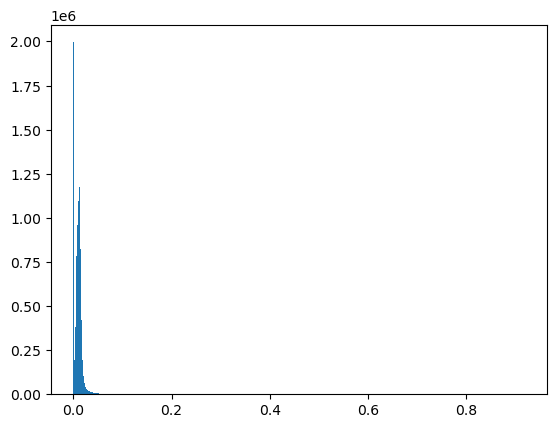

In [43]:
# get nerf opacity field
dimmax = 0.6*(234/255) # bbox of volume in wolrd coord from extract_mesh_nyx.py
stepsize = dimmax*2 / 255
display(dimmax, stepsize)
pred_op = raw2alpha(pred, stepsize)

plt.hist(pred_op.flatten(), bins=1000)
plt.show()

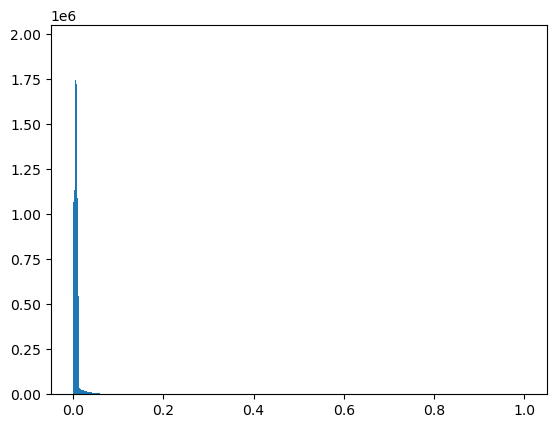

In [44]:
# get GT opacity field
with open("logs/nyx_example/nyx0.json", "rb") as f:
  transF = json.load(f)

opTF = np.array(transF[0]['Points'], dtype=np.float32)
opTF = opTF.reshape(-1, 4)[:, :2]
opTF_intp = intp.interp1d(opTF[:,0], opTF[:,1])

gtlog = np.log10(gt)
gt_op = opTF_intp(gtlog)

plt.hist(gt_op.flatten(), bins=1000)
plt.show()

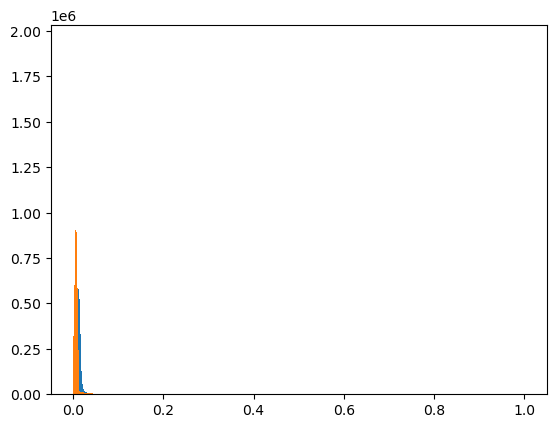

In [46]:
plt.hist(pred_op.flatten(), bins=2000)
plt.hist(gt_op.flatten(), bins=2000)
plt.show()

(256, 256, 256)

In [23]:
opTF.reshape(-1, 4)

array([[ 8.8090925 ,  0.        ,  0.5       ,  0.        ],
       [ 9.227956  ,  0.        ,  0.5       ,  0.        ],
       [10.1       ,  0.01293103,  0.5       ,  0.        ],
       [10.713017  ,  0.09482758,  0.5       ,  0.        ],
       [11.131882  ,  0.875     ,  0.5       ,  0.        ],
       [12.19808   ,  1.        ,  0.5       ,  0.        ]],
      dtype=float32)

In [16]:
imin, imax = 0, 100
pred_block = pred[imin:imax, imin:imax, imin:imax].flatten()
gt_block = gt[imin:imax, imin:imax, imin:imax].flatten()

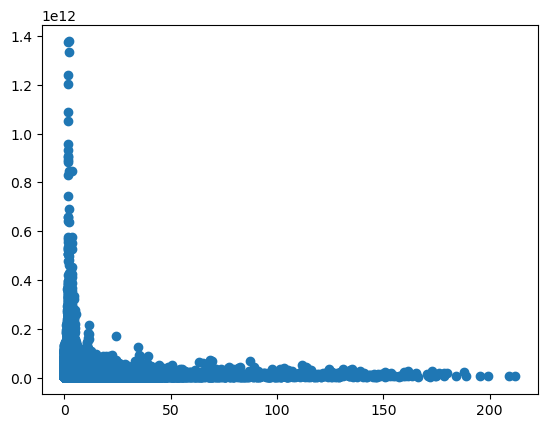

In [17]:
plt.scatter(pred_block, gt_block)

In [3]:
sigma = rgbd[...,-1]

In [8]:
sigma.shape

(257, 257, 257)

In [ ]:
sigma = rgbd[...,-1]
.

In [ ]:
sigma.tofile("vol/lego.bin")

(array([1.6450044e+07, 2.8594700e+05, 1.5309900e+05, 5.6513000e+04,
        1.9735000e+04, 6.6660000e+03, 1.8970000e+03, 5.5000000e+02,
        1.3000000e+02, 1.2000000e+01]),
 array([ -43.779877,   80.44573 ,  204.67134 ,  328.89694 ,  453.12256 ,
         577.34814 ,  701.5738  ,  825.7994  ,  950.02496 , 1074.2506  ,
        1198.4762  ], dtype=float32),
 <BarContainer object of 10 artists>)

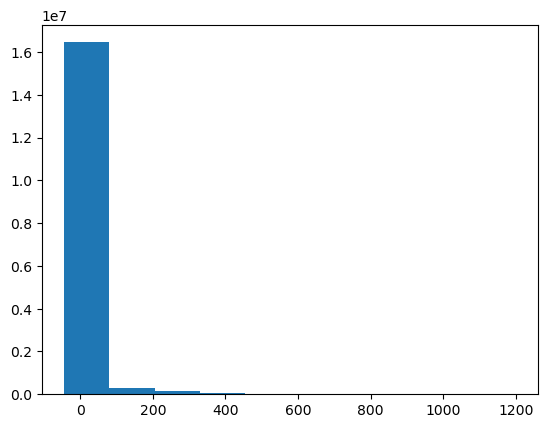

In [7]:
plt.hist(sigma.flatten())